# HW2 
## Wenjie Sun (WS854)

## 1 (a)

In [4]:
install.packages('devtools')
devtools::install_github('IRkernel/IRkernel')

also installing the dependencies ‘memoise’, ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
from URL https://api.github.com/repos/IRkernel/IRkernel/zipball/master
Warning message:
“GitHub repo contains submodules, may not function as expected!”Installing IRkernel
Warning message in utils::untar(src, exdir = target, compressed = "gzip"):
“‘/usr/bin/gnutar -xf '/var/folders/0_/_ztstqr576q_6bg61mmgp14m0000gn/T//Rtmpj3AUP5/digest_0.6.12.tar.gz' -C '/var/folders/0_/_ztstqr576q_6bg61mmgp14m0000gn/T//Rtmpj3AUP5/devtoolse1f03758302f'’ returned error code 127”

ERROR: Error in system(cmd, intern = TRUE): error in running command


In [2]:
install.packages("quanteda") 

also installing the dependency ‘XML’

Warning message in install.packages("quanteda"):
“installation of package ‘XML’ had non-zero exit status”Warning message in install.packages("quanteda"):
“installation of package ‘quanteda’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(quanteda)
Q1_lepen <- c(lepen1= "immigration women assimilate afraid win",
        lepen2 = "culture voter economy president help",
        lepen3 = "economy voter immigration president culture")
Q1_macron <- c(
        macron1 = "voter women help reform education",
        macron2 = "union economy hope immigration neighbourhood",
        marcon3 = "win union europe elect president",
        macro4 = "success german culture help french")
Q1_new <- c(new = "immigration voter culture help neighbourhood")
lepen_dfm <- dfm(Q1_lepen)
macron_dfm <- dfm(Q1_macron)
new_dfm <- dfm(Q1_new)
lepensum <- sum(lepen_dfm)
macrosum <- sum(macron_dfm)

In [4]:
macrosum

[1] 20

In [380]:
# without smoothing 
newwords <- colnames(new_dfm)
macron_p <- 1 
lepen_p <-1

# try count number of occurance of a praticualr word from the next text 
# and find the probability of each from both classes then update the total probabily 
for (i in (1:length(newwords))) {
    macron_count <- try(sum(macron_dfm[,newwords[i]]))
    if (class(macron_count) == "try-error" ) {
        macron_count <- 0 
    }
    macron_p <- macron_p * (macron_count/macrosum)
    
    lepen_count <- try(sum(lepen_dfm[,newwords[i]]))
    if (class(lepen_count) == "try-error" ) {
        lepen_count <- 0 
    }
    lepen_p <- lepen_p * (lepen_count/lepensum)
}

macron_p
lepen_p

[1] 6.25e-07

[1] 0

Choose Macron

In [363]:
# use package 
Q1_training <- c(lepen1= "immigration women assimilate afraid win",
        lepen2 = "culture voter economy president help",
        macron1 = "voter women help reform education",
        macron2 = "union economy hope immigration neighbourhood",
        marcon3 = "win union europe elect president",
        lepen3 = "economy voter immigration president culture",
        macro4 = "success german culture help french",
        new = "immigration voter culture help neighbourhood")
Q1_dfm <- dfm(Q1_training) # since neighborhood and neighbourhood spelit differently
training_class<-factor(c("lepen","lepen","macron","macron","macron","lepen","macron"),ordered = TRUE)

# Predict without smoothing
predict(textmodel_NB(Q1_dfm[1:7],training_class,smooth = 0),newdata = Q1_dfm[8])

Predicted textmodel of type: Naive Bayes

    lp(lepen) lp(macron)    Pr(lepen) Pr(macron) Predicted
new      -Inf  -14.97866       0.0000     1.0000    macron


#### Becasue "neighbourhood" doesn't exist in any of lepen's speech, thus the probabily on this word given by lepen becomes 0. And when mutply  all the probability, the total probabiltly becomes 0 too. However, I would not trust the finding becasue the prediction should not be based on one signle word. Also, the probability of Macron is also really small. 

## 1 (b)

In [6]:
# with smoothing 
newwords <- colnames(new_dfm)
macron_p <- 1 
lepen_p <-1

# try count number of occurance of a praticualr word from the next text 
# and find the probability of each from both classes then update the total probabily 
# on demoniator, add number of words used in each class
for (i in (1:length(newwords))) {
    macron_count <- try(sum(macron_dfm[,newwords[i]]))
    if (class(macron_count) == "try-error" ) {
        macron_count <- 0 
    }
    macron_p <- macron_p * ((macron_count+1)/(macrosum+length(colnames(macron_dfm))))
    
    lepen_count <- try(sum(lepen_dfm[,newwords[i]]))
    if (class(lepen_count) == "try-error" ) {
        lepen_count <- 0 
    }
    lepen_p <- lepen_p * ((lepen_count+1)/(lepensum+length(colnames(lepen_dfm))))
}

(3*lepen_p) / (4*(lepen_p+ macron_p))


[1] 0.6759471

Choose Lepen

In [388]:
# Predict with smoothing with existing package 
predict(textmodel_NB(Q1_dfm[1:7],training_class,smooth = 1),newdata = Q1_dfm[8])

Predicted textmodel of type: Naive Bayes

    lp(lepen) lp(macron)    Pr(lepen) Pr(macron) Predicted
new  -14.4809  -15.26634       0.6869     0.3131     lepen


#### After smoothing, the prediction is now for lepen. This makes more sense since other owrds like "immgration" or "culture" are frequently used by him. 

## 2 (a)

#### No need for any pre-processing for 2(a)

In [389]:
#load data
df.reviews<- read.csv("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/amazon_reviews.csv",stringsAsFactors = F)
# recode the label 1/0  
df.reviews$Y <- ifelse(df.reviews$Score >mean(df.reviews$Score), 1, 0)
# code anchor positive 
df.reviews$Anchor_Pos<-ifelse(df.reviews$Score ==5 , 1, 0)
# code anchor negative
df.reviews$Anchor_Neg<-ifelse(df.reviews$Score ==1 , 1, 0)
# preview the head
head(df.reviews,3)

X,Text,Score,Y,Anchor_Pos,Anchor_Neg
5249,My grandchildren have watched this and ICarly and I reluctantly watched as well. I found that both programs were entertaining and fresh. Victorious adds the musical element to supplement the light hearted humor. Definitely not bound for an Emmy but still the silliness is infectious.,4,1,0,0
8679,"I am no longer interested in watching TV dramas that victimize women and children. If this is the only story the producers have to tell, I'm not going to give it a good rating.",1,0,0,1
27027,I could not even get through the first 15 minutes of the first episode. Would you hang out sober in a bar for yuks? Ask any bar tender...,1,0,0,1


## 2 (b)

#### since the negative and positve list doesn't look like is stemed, I will process the data without stemming. However, all the words in both neg/pos dictionary are lowercase and has no stopwords, so I will lower case and remove stopwords

In [396]:
tail(readLines("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/negative-words.txt"))

[1] "zapped"    "zaps"      "zealot"    "zealous"   "zealously" "zombie"

#### [1]

In [397]:

# create a negative dictionary
negdict <- dictionary(list(neg=readLines("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/negative-words.txt")))
# create a dfm of negative words only
dfm_neg<-dfm(df.reviews$Text, dictionary=negdict,tolower = TRUE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE)
# create a positive dictionary
posdict <- dictionary(list(pos=readLines("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/positive-words.txt")))
# create a dfm of positive words only
dfm_pos<-dfm(df.reviews$Text, dictionary=posdict,tolower = TRUE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE)

In [401]:
sentiment_score <- matrix(0,ncol=1,nrow=10000)

# calculate dichotomous vector by number of positive words minus number of negative words
for (i in (1:nrow(sentiment_score))) {
  sentiment_score[i]<-dfm_pos[i]-dfm_neg[i]
}

In [484]:
# make it a binary vector (1 - 0 )

dichotomous_vector <- ifelse(sentiment_score<0,0,1)
head(dichotomous_vector,10)

1
1
1
1
1
1
0
0
1
0


#### [2]

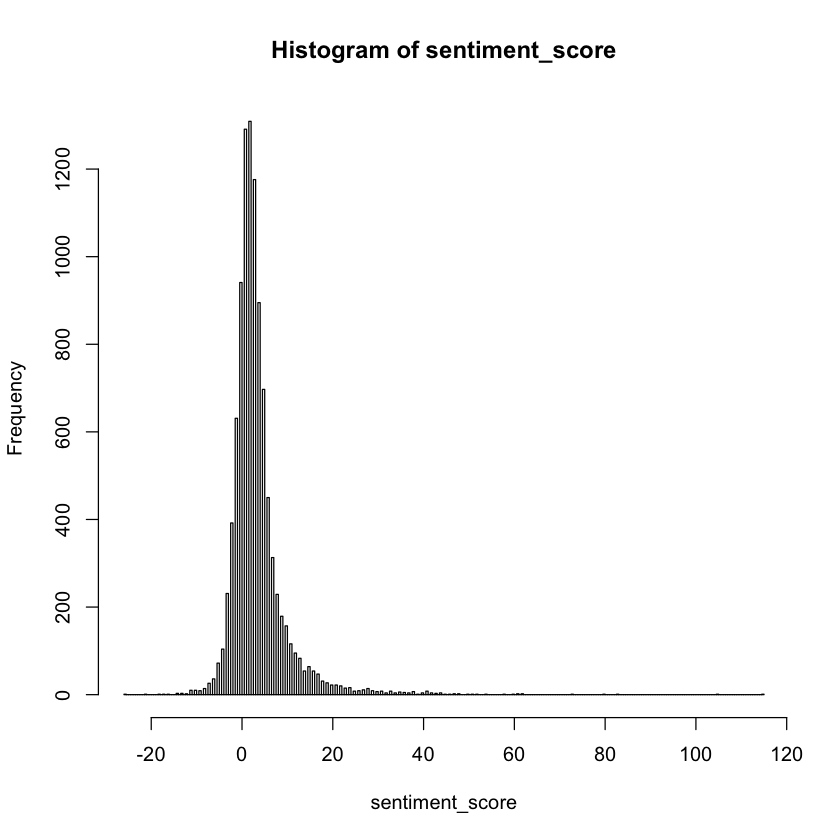

In [403]:

hist(sentiment_score,breaks=500) 

In [404]:
sum(dichotomous_vector)/nrow(dichotomous_vector)

[1] 0.8452

#### 84.52 % of reviews have a postive score

#### [3]

In [405]:

#create confusion matrix
tab<- table(dichotomous_vector,df.reviews$Y)
tab

                  
dichotomous_vector    0    1
                 0 1291  257
                 1 3716 4736

In [406]:
accuracy <- (tab[1,1]+tab[2,2])/sum(tab)
accuracy

[1] 0.6027

In [407]:
precision <- tab[2,2] /(tab[2,2]+tab[2,1])
precision

[1] 0.5603407

In [408]:
recall <- tab[2,2] /(tab[2,2]+tab[1,2])
recall

[1] 0.9485279

#### [4]

In [409]:

# Add Sentiment Score into DF
df.reviews$Sentiment <- sentiment_score

In [410]:
# Create a df to rank sentiment score
df_SentRank<- df.reviews[,c("X","Sentiment")]
df_SentRank<- df_SentRank[order(-df_SentRank[,2]), ]
df_SentRank$Rank <- seq(1, 10000, by=1)

In [411]:
# Create a df to rank actual score
df_ActRank<- df.reviews[,c("X","Score")]
df_ActRank<- df_ActRank[order(-df_ActRank[,2]), ]
df_ActRank$Rank <- seq(1, 10000, by=1)

In [413]:
RankSum = 0
# loop through Actual rank to find the coropsonding sentiment rank by the key X 
for (i in (1:nrow(df_ActRank))) {
  RankSum = RankSum + abs (df_SentRank[which(df_SentRank$X ==df_ActRank$X[i] ),]$Rank - df_ActRank[which(df_ActRank$X ==df_ActRank$X[i] ),]$Rank)   
}
RankSum

[1] 27389662

## 2 (c)

#### [1] - uniform 

In [415]:


# df.reviews is the original dataset (the only change is it is now appended a sentiment score from previous question)

# shuffle data (since it is a supervised test, I will rather shuffle data first)
df1 <- df.reviews[sample(nrow(df.reviews)),]

#### I chose to stem the words for this task. For example, running and run, I think it is very close to each other and I want them to represent the same probabiliy in this case.

In [7]:
# generate dfm of all text 
dfm_df <- dfm(df1$Text,tolower = FALSE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE)
# training class
training_class <-factor(df1$Y[1:2000],ordered = TRUE)
# predict function 
pred<- predict(textmodel_NB(dfm_df[1:2000],training_class,smooth = 1, prior = "uniform"),newdata =dfm_df[2001:10000]) 

ERROR: Error in dfm(df1$Text, tolower = FALSE, stem = FALSE, remove = stopwords("english"), : object 'df1' not found


In [417]:
tab<- table(pred$nb.predicted,df1$Y[2001:10000])
tab

   
       0    1
  0 3338 1296
  1  677 2689

In [418]:
accuracy <- (tab[1,1]+tab[2,2])/sum(tab)
accuracy

[1] 0.753375

In [419]:
precision <- tab[2,2] /(tab[2,2]+tab[2,1])
precision

[1] 0.7988711

In [420]:
recall <- tab[2,2] /(tab[2,2]+tab[1,2])
recall

[1] 0.6747804

#### [2] - docfreq

In [421]:

# predict function 
pred<- predict(textmodel_NB(dfm_df[1:2000],training_class,smooth = 1, prior = "docfreq"),newdata =dfm_df[2001:10000]) 

In [422]:
tab<- table(pred$nb.predicted,df1$Y[2001:10000])
tab

   
       0    1
  0 3333 1289
  1  682 2696

In [423]:
accuracy <- (tab[1,1]+tab[2,2])/sum(tab)
accuracy

[1] 0.753625

In [424]:
precision <- tab[2,2] /(tab[2,2]+tab[2,1])
precision

[1] 0.7981054

In [425]:
recall <- tab[2,2] /(tab[2,2]+tab[1,2])
recall

[1] 0.676537

#### I will assume docfreq may have a slightly higher accuracy, but not guarantted. The reason is i don't know if all these reviews were for the same or similar product. If these reviews are randomly for any product on amazon, i think using docfreq as prior wouldn't help to make it more accuracy (since the chance of having a word appeared in any review now becomes almost random). 

#### [3]
#### It is the same as question 1, without smoothing, new word that doesn't exist in the training set will be counted as 0 probabiliy. So, the overall probability will be 0 for that review.

## 2 (d)

In [426]:
# Generate a dataframe only has anchor positive / negative 
anchor_pos <- df.reviews[which(df.reviews$Anchor_Pos==1), ]
anchor_neg <- df.reviews[which(df.reviews$Anchor_Neg==1), ]

#### same process as 2(c). 

In [428]:
# Generate dfm in matrix 
anchor_pos_dfm <- as.matrix(dfm(anchor_pos$Text,tolower = TRUE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE))
anchor_neg_dfm <- as.matrix(dfm(anchor_neg$Text,tolower = TRUE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE))


In [430]:
# Generate a list of all the words in anchor positive and negative reviews,
# which is a list of all the words to get all wordscore 
all_words <- unique(c(colnames(anchor_pos_dfm),colnames(anchor_neg_dfm)))

# total number of words in positive reviews and negative reviews 
total_pos <- sum(anchor_pos_dfm )
total_neg <- sum(anchor_neg_dfm )

# create a matrix for all the postive and negative probability 
prob <- matrix (0,ncol = 2, nrow = length(all_words))

In [431]:
# use a for loop to search if a praticular word exists in the positive document, 
# if yes, then calculate the (total number of apperance / total word number in positive)
# else, it is 0 
for (i in (1:length(all_words))) {
    pos_count <- try(sum(anchor_pos_dfm[,all_words[i]]))
    if (class(pos_count) == "try-error" ) {
        pos_count <- 0 
    }
    prob[i,1] <- pos_count/total_pos    
}

In [433]:
# same logic for negative words
for (i in (1:length(all_words))) {
    neg_count <- try(sum(anchor_neg_dfm[,all_words[i]]))
    if (class(neg_count) == "try-error" ) {
        neg_count <- 0 
    }
    prob[i,2] <- neg_count/total_neg    
}

In [435]:
# create a dataframe
df_prob<- as.data.frame(prob, row.names = all_words)
colnames(df_prob) <- c("pos_prob", "neg_prob")

In [436]:
# calculate positive and negative probabiliy 
df_prob$P_i_Pos <- with(df_prob,(pos_prob/(pos_prob+neg_prob)))
df_prob$P_i_Neg <- with(df_prob,(neg_prob/(pos_prob+neg_prob)))

In [437]:
# calculate the wordscore
df_prob$wordscore <- with(df_prob,(P_i_Pos-P_i_Neg))

In [438]:
# total number of pure positive word
extrem_pos <- df_prob[which(df_prob$wordscore == 1),]
length(extrem_pos$wordscore)

[1] 9439

In [439]:
# total number of pure negative word
extrem_neg <- df_prob[which(df_prob$wordscore == -1),]
length(extrem_neg$wordscore)

[1] 7250

In [440]:
# most extrem postive word 
extrem_pos[which(extrem_pos$pos_prob == max(extrem_pos$pos_prob)),]

,pos_prob,neg_prob,P_i_Pos,P_i_Neg,wordscore
poirot,0.0003155229,0,1,0,1


In [441]:
# most extrem negative word
extrem_neg[which(extrem_neg$neg_prob == max(extrem_neg$neg_prob)),]

,pos_prob,neg_prob,P_i_Pos,P_i_Neg,wordscore
zero,0,0.000373781,0,1,-1


#### [2]

In [443]:

# reload the whole data
reviews_dfm <- as.matrix(dfm(df.reviews$Text,tolower = TRUE, stem = FALSE, remove = stopwords("english"),removePunct = TRUE))

In [444]:
# remove all the words that don't exist in the wordscore matrix 
reviews_dfm <- reviews_dfm[ ,which((colnames(reviews_dfm) %in% rownames(df_prob))==TRUE)] 

In [445]:
# create a vector to store wordscore result 
wordscore_review <- matrix (0,ncol = 1, nrow = nrow(reviews_dfm))
# create a list of reviews_dfm colnames (which are all the words that have wordscore)
reviews_dfm_colname<-colnames(reviews_dfm)

In [446]:
# for every text in the reviews_dfm
# for every word in each text
# calculate the number of times / total number of words in that text * wordscore of that word 

for (i in (1:nrow(reviews_dfm))){
    prob <- 0 
    numberwords <- sum(reviews_dfm[i,])
    for (j in (1:length(reviews_dfm_colname))){        
        if (reviews_dfm[i,j]==0){
            prob <- prob+0 

        }
        else {
            word_score<- df_prob[which(rownames(df_prob)==reviews_dfm_colname[j]),]$wordscore
            prob <- prob + (reviews_dfm[i,j]/numberwords)*word_score   

        }            
        
    }
    wordscore_review[i] <- prob   
}

In [447]:
df.reviews$wordscore <- wordscore_review

In [448]:
df_SentRank1 <- df.reviews[,c("X","wordscore")]
df_SentRank1 <- df_SentRank1[order(-df_SentRank1[,2]),]
df_SentRank1$Rank <- seq(1,10000,by =1 )

In [449]:
RankSum1 = 0

for (i in (1:nrow(df_ActRank))) {
  RankSum1 = RankSum1 + abs (df_SentRank1[which(df_SentRank1$X ==df_ActRank$X[i] ),]$Rank - df_ActRank[which(df_ActRank$X ==df_ActRank$X[i] ),]$Rank)   
}
RankSum1

[1] 14371636

#### It looks that the wordscore has a better rank. However, i am not sure if this is a fair evulation because the actual score is only 1, 2, 3, 4, 5, so the rank can be 1 or 1000 for the same score, which is pretty random/

## 2 (e)

#### [1]

#### I think SVM and NB use all available data, while dictionary and wordscore only use partial data. 

In [178]:
install.packages("tm")
install.packages("NLP")
install.packages("https://cran.r-project.org/bin/windows/contrib/3.4/prodlim_1.6.1.zip",repos = NULL, method = "libcurl")
install.packages("RTextTools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [450]:
library(NLP)
library(tm)
library(RTextTools)
library(wordcloud)

#### [2]

In [451]:

#reload data 
df.reviews<- read.csv("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/amazon_reviews.csv",stringsAsFactors = F)
# recode the label 1/0  
df.reviews$Y <- ifelse(df.reviews$Score >mean(df.reviews$Score), 1, 0)
# code anchor positive 
df.reviews$Anchor_Pos<-ifelse(df.reviews$Score ==5 , 1, 0)
# code anchor negative
df.reviews$Anchor_Neg<-ifelse(df.reviews$Score ==1 , 1, 0)
df.reviews<- df.reviews[1:1000,]

#### Same as previous question, stem word and and remove puncutation

In [452]:
dtm  <- create_matrix(df.reviews$Text, language="english", stemWords = TRUE,
                      weighting = weightTfIdf, removePunctuation = TRUE)

In [453]:
container <- create_container(dtm, t(df.reviews$Y), trainSize=1:length(df.reviews$Y),
                              virgin=FALSE)

In [454]:
cv.svm <- cross_validate(container, nfold=5, algorithm = 'SVM', kernel = 'linear')

Fold 1 Out of Sample Accuracy = 0.9800995
Fold 2 Out of Sample Accuracy = 0.96
Fold 3 Out of Sample Accuracy = 0.9624413
Fold 4 Out of Sample Accuracy = 0.974026
Fold 5 Out of Sample Accuracy = 0.9689922


In [455]:
train_test_size <- seq(0.1, 0.9, by = 0.1)
SVM_accuracy <- matrix (0,ncol = 1, nrow = length(train_test_size))

In [456]:
for (i in (1:nrow(SVM_accuracy))) {
    training_break <- as.integer(train_test_size[i]*nrow(df.reviews))
    container<- create_container(dtm, t(df.reviews$Y), trainSize=1:training_break,
                                   testSize=training_break:nrow(df.reviews), virgin=FALSE)
    cv.svm <- cross_validate(container, nfold=5, algorithm = 'SVM', kernel = 'linear')
    SVM_accuracy[i]<- cv.svm$meanAccuracy  
}
SVM_accuracy

Fold 1 Out of Sample Accuracy = 0.8058252
Fold 2 Out of Sample Accuracy = 0.8172589
Fold 3 Out of Sample Accuracy = 0.8121547
Fold 4 Out of Sample Accuracy = 0.8599034
Fold 5 Out of Sample Accuracy = 0.8190476
Fold 1 Out of Sample Accuracy = 0.8029557
Fold 2 Out of Sample Accuracy = 0.8578947
Fold 3 Out of Sample Accuracy = 0.8028169
Fold 4 Out of Sample Accuracy = 0.8481675
Fold 5 Out of Sample Accuracy = 0.8872549
Fold 1 Out of Sample Accuracy = 0.8243902
Fold 2 Out of Sample Accuracy = 0.8121827
Fold 3 Out of Sample Accuracy = 0.8229665
Fold 4 Out of Sample Accuracy = 0.8274112
Fold 5 Out of Sample Accuracy = 0.8497409
Fold 1 Out of Sample Accuracy = 0.7673267
Fold 2 Out of Sample Accuracy = 0.8396226
Fold 3 Out of Sample Accuracy = 0.8638743
Fold 4 Out of Sample Accuracy = 0.8248848
Fold 5 Out of Sample Accuracy = 0.8212291
Fold 1 Out of Sample Accuracy = 0.8311111
Fold 2 Out of Sample Accuracy = 0.8502674
Fold 3 Out of Sample Accuracy = 0.8461538
Fold 4 Out of Sample Accuracy = 0.

0.8228380
0.8398179
0.8273383
0.8233875
0.8403758
0.8326476
0.8284281
0.8293514
0.8266031


In [457]:
max(SVM_accuracy)

[1] 0.8403758

#### When I used 50%, it gets max SVM accuracy. However, it seems that the ration is not that important since the accuracy is pretty close to each other.

#### [3]
#### I guess linear will be better since text analysis already has a large number of features. 

In [458]:
for (i in (1:nrow(SVM_accuracy))) {
    training_break <- as.integer(train_test_size[i]*nrow(df.reviews))
    container<- create_container(dtm, t(df.reviews$Y), trainSize=1:training_break,
                                   testSize=training_break:nrow(df.reviews), virgin=FALSE)
    cv.svm <- cross_validate(container, nfold=5, algorithm = 'SVM', kernel = 'radial')
    SVM_accuracy[i]<- cv.svm$meanAccuracy  
}
SVM_accuracy

Fold 1 Out of Sample Accuracy = 0.7953488
Fold 2 Out of Sample Accuracy = 0.785
Fold 3 Out of Sample Accuracy = 0.8010471
Fold 4 Out of Sample Accuracy = 0.7525773
Fold 5 Out of Sample Accuracy = 0.7960199
Fold 1 Out of Sample Accuracy = 0.825
Fold 2 Out of Sample Accuracy = 0.7759563
Fold 3 Out of Sample Accuracy = 0.7868852
Fold 4 Out of Sample Accuracy = 0.7382199
Fold 5 Out of Sample Accuracy = 0.7941176
Fold 1 Out of Sample Accuracy = 0.761658
Fold 2 Out of Sample Accuracy = 0.8252427
Fold 3 Out of Sample Accuracy = 0.7723214
Fold 4 Out of Sample Accuracy = 0.7574257
Fold 5 Out of Sample Accuracy = 0.8181818
Fold 1 Out of Sample Accuracy = 0.8232558
Fold 2 Out of Sample Accuracy = 0.7526316
Fold 3 Out of Sample Accuracy = 0.7703349
Fold 4 Out of Sample Accuracy = 0.7638191
Fold 5 Out of Sample Accuracy = 0.8191489
Fold 1 Out of Sample Accuracy = 0.7724868
Fold 2 Out of Sample Accuracy = 0.7945946
Fold 3 Out of Sample Accuracy = 0.8165138
Fold 4 Out of Sample Accuracy = 0.7810945
F

0.7859986
0.7840358
0.7869659
0.7858381
0.7858225
0.7852730
0.7865111
0.7859559
0.7854203


In [460]:
max(SVM_accuracy)

[1] 0.7869659

#### When i used 30%, it gets the maximum. However, it is the same as previous question that the ratio doesn't seem to be very important to impact on the accuracy. So, linear model is better than raidal. 

## 3 (a)

#### [1] 

In [462]:
#load data
df.hit<- read.csv("/Users/sunevan/Dropbox/Spring 2017/Text As Data/HW2/CF_rate_trustworthiness.csv",stringsAsFactors = F)
unique(df.hit$X_country)

[1] "BIH" "POL" "ESP" "JOR" "IND" "CAN" "SRB" "USA" "JPN" "TUR" "UKR" "GRC"
[13] "GBR" "PRT" "VEN" "PAK" "HKG" "ARG" "MEX" "MYS" "DEU" "BGD" "FIN" "ITA"
[25] "IDN" "BGR" "ROU" "EGY" "AUT" "PHL" "RUS" "HRV" "CHL" ""    "SVK"

In [463]:
df.hit[which(df.hit$X_country == ''),] 

,X_unit_id,X_created_at,X_id,X_started_at,X_tainted,X_channel,X_trust,X_worker_id,X_country,X_region,X_city,X_ip,rating,image_name,url
182,726049343,5/26/2015 15:31:12,1643434072,5/26/2015 15:31:05,false,clixsense,1,31151345,,,,185.79.230.246,7,whitewoman8,https://raw.githubusercontent.com/kmunger/images/master/whitewoman8.jpg


#### It seems that there is a data error that #182 row doesn't have country nationality. Remove this from the whole dataset

In [464]:
df.hitnew <- df.hit[which(df.hit$X_country != ''),] 
head(df.hitnew,2)

X_unit_id,X_created_at,X_id,X_started_at,X_tainted,X_channel,X_trust,X_worker_id,X_country,X_region,X_city,X_ip,rating,image_name,url
726049306,5/26/2015 15:32:50,1643434598,5/26/2015 15:32:44,false,clixsense,1,32145508,BIH,01,Sarajevo,185.13.242.248,4,blackman1,https://raw.githubusercontent.com/kmunger/images/master/blackman1.jpg
726049306,5/26/2015 15:32:54,1643434614,5/26/2015 15:32:46,false,neodev,1,30448360,POL,73,Polska,31.61.136.172,1,blackman1,https://raw.githubusercontent.com/kmunger/images/master/blackman1.jpg


In [465]:
nation <- unique(df.hitnew$X_country)

p_value <- matrix(0,ncol = 1, nrow = length(nation))

for (i in (1:length(nation))){
    
    x <- df.hit[which(df.hit$X_country == nation[i]),]$rating
    y <- df.hit[which(df.hit$X_country != nation[i]),]$rating
    if (length(x)==1){
        p_value[i]<- 1 
    }
    else {
        p_value[i] <- t.test(x,y,alternative = "greater")["p.value"]  
    } 
    
}


In [466]:
p_value_df <- data.frame(as.matrix(nation),as.matrix(p_value))
colnames(p_value_df) <- c("nationality","p_value")

In [271]:
# filter out signicant nationality 
p_value_nation<-p_value_df[which(p_value_df$p_value<=0.05),]

In [467]:
# compute x_avg (the particular nationality) vs y_avg (all other nationality)
X_avg <-  matrix(0,ncol = 1, nrow = nrow(p_value_nation))
Y_avg <- matrix(0,ncol = 1, nrow = nrow(p_value_nation))

for (i in (1:nrow(p_value_nation))){
    
    X_avg[i] <- mean(df.hit[which(df.hit$X_country == p_value_nation[i,1]),]$rating)
    Y_avg[i] <- mean(df.hit[which(df.hit$X_country != p_value_nation[i,1]),]$rating)
    
}

p_value_nation$X_avg <- X_avg
p_value_nation$Y_avg <- Y_avg

In [468]:
p_value_nation

,nationality,p_value,X_avg,Y_avg
8,USA,0.03518437,6.600000,5.995349
9,JPN,0.0008219275,8.166667,5.948598
13,GBR,0.007040027,7.714286,5.953052
17,HKG,0.02397056,7.000000,5.971698
21,DEU,0.01374244,7.000000,5.986047
26,BGR,0.01862525,8.600000,5.948837
30,PHL,0.04535236,9.000000,5.967742
33,CHL,1.20607e-73,10.000000,5.972477


#### [2]

In [469]:

# remove number from the string 
df.hit$demographic <-gsub('[0-9]+', '', df.hit$image_name)

# process data for race and gender 
Gender <- matrix(0,ncol = 1, nrow = nrow(df.hit))
for (i in (1:nrow(df.hit))){
    if (df.hit$demographic[i] == "whitewoman") {
        Gender[i] <- "w"        
    }
    else {
        Gender[i] <- "m"
        
    }
              
    }

df.hit$Gender <- Gender

In [470]:
demographic.aov <- aov(df.hit$rating ~ df.hit$demographic)

In [471]:
summary(demographic.aov)

                    Df Sum Sq Mean Sq F value Pr(>F)  
df.hit$demographic   2   34.6  17.284   3.776 0.0244 *
Residuals          217  993.4   4.578                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### 0.0244, so it is significant

#### [3]

In [360]:

man <- df.hit[which(df.hit$Gender == 'm'),]$rating
woman <- df.hit[which(df.hit$Gender != 'm'),]$rating
t.test(woman,man)  


	Welch Two Sample t-test

data:  woman and man
t = 1.7449, df = 137.06, p-value = 0.08324
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07363011  1.17891746
sample estimates:
mean of x mean of y 
 6.373333  5.820690 


#### Not significant

#### [4]

In [475]:
unique(df.hit$X_channel)

[1] "clixsense"      "neodev"         "elite"          "tremorgames"   
[5] "points4rewards"

#### a) I will ask if different channel is related to the ratings. It seems that someone is doing the test for rewards. Maybe this group of people will spend much less time to really focus on the ratings and give random answers

In [478]:
image.aov <- aov(df.hit$rating ~ df.hit$image_name)

In [479]:
summary(image.aov)

                   Df Sum Sq Mean Sq F value  Pr(>F)   
df.hit$image_name  43  310.4   7.218    1.77 0.00541 **
Residuals         176  717.6   4.077                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### b) Also, the quality of the image self. It is clear that it is significant that different images has clearly different average rating. I will ask them to filter images that have clearly higher or lower average rating than others. 